# Diseño

El diseño de la práctica se ha hecho con una clase _Datos_ que contiene un dataframe y un string que indica si se ven todas las estaciones o de verse solo una cuál de ellas se ve.
La clase datos contiene todas las funciones relativas al trato del dataframe:
* _imprimeCantidad_: Muestra la tabla y el gráfico de barras correspondiente a n2 y su cantidad total. Mostrando n1 en el mensaje por pantalla
* _muestra_: saca por pantalla la tabla del dataFrame
* _describe_: Muestra por pantalla la media, el mínimo y el máximo de los datos   
* _cantidadEngrupo_: devuelve un objeto datos cuyo dataFrame tiene una columna (dada en los parámetros) con los elementos distintos posibles de la misma y otra columna count con el total de estos en el dataframe.     
* _filtraPor_: devuelve un objeto datos cuyo dataFrame con los elementos de una columna concreta que tienen un valor dado.  
* _filtraEstaciones_: devuelve un objeto datos cuyo dataframe con los viajes desde o hasta una estación estación dada.
* _grafico_: devuelve un gráfico hecho con los datos de las columnas que se indique. 
Después se ha hecho una extensión de _Datos_ para la primera vez que se leen y se almacenan: _Consulta_. El constructor de esta clase recibe como argumento una lista con los nombres de los ficheros a leer (que deben ser JSON). 
Para hacer más legibles los datos, _Consulta_ convierte la duración del viaje, que está en segundos a minutos. También separa el Timestamp que representa la hora a la que se cogió en día y hora, de forma que podemos tratar con las horas directamente para nuestro análisis.
Esta clase también cuenta con un método extra a Datos: 
* _formateaEstaciones_: Cambia los id de las estaciones de Salida y Llegada por los nombres de dichas estaciones, para hacerlos más legibles, y poder tratar con datos con nombres, que son más reconocibles. A parte, esto nos permite luego hacer el filtro según el nombre de la estación.

# Objetivo

Centrándose en las estaciones de Puerta del Sol en 2020:

- Ver cantidad de viajes por rangos de Edad en comparación con los generales.
- Ver la afluencia por hora.
- Ver duración media de los viajes.
- Comparar esta estación con los datos generales.
- Comparar cantidad de viajes y edad de los usuarios con los de 2019.

Nuestro propósito es ver la forma en que afectaron las restricciones al uso de BiciMAD en 2020 y como se comparan las estaciones de Puerta del Sol con el resto de datos, ya que cabe esperar que sean muy frecuentadas, tanto por los turistas como por quienes trabajan cerca.

# Aplicacion

In [1]:
from practica_4 import Consulta
import os

Inicializamos las constantes para la ruta de los archivos

In [2]:
path = 'DatosBICIMAD'
estaciones = 'Estaciones.json'
pathYear = lambda y: path+f'/BiciMAD_{y}'

Realizamos la consulta para el año 2020 en la estación de Sol:

In [3]:
y = 2020
nEst = 'Sol'
pathY = pathYear(y)
consulta = Consulta([f'{pathY}/{item}' for item in os.listdir(pathY) if item.endswith('.json')])

In [4]:
print(f'Viajes hechos en {y}')
consulta.describe()

Viajes hechos en 2020
+-------+-----------------+------------------+------------------+------------------+
|summary|         Duracion|      tipo_Usuario|        rango_Edad|              Hora|
+-------+-----------------+------------------+------------------+------------------+
|  count|          3379762|           3379762|           3379762|           3379762|
|   mean|27.49077303076377|1.1168274570812975|1.9428995296118483|14.491208256676062|
| stddev| 770.951534366882|0.4956659837762535| 2.193676531392969| 5.721635763356992|
|    min|             0.02|                 1|                 0|                 0|
|    max|        151307.98|                 7|                 6|                23|
+-------+-----------------+------------------+------------------+------------------+



La duración media de los viajes en 2020 fue de 27.49 minutos.

In [5]:
dCU = consulta.formateaEstaciones().filtraEstaciones(nEst)

print(f'Viajes hechos desde o hasta las estaciones de {nEst} en {y}')
dCU.describe()

Viajes hechos desde o hasta las estaciones de Sol en 2020
+-------+-----------------+------------------+------------------+------------------+
|summary|         Duracion|      tipo_Usuario|        rango_Edad|              Hora|
+-------+-----------------+------------------+------------------+------------------+
|  count|            40958|             40958|             40958|             40958|
|   mean| 47.1878871038625| 1.112163679867181|1.9024854729234826|14.886176082816544|
| stddev|1273.851592622865|0.5088450277995603| 2.206298303270501| 5.677248759350753|
|    min|             0.03|                 1|                 0|                 0|
|    max|         81390.85|                 6|                 6|                23|
+-------+-----------------+------------------+------------------+------------------+



La duración media de los viajes en el mismo año en las estaciones de Sol, fue de 47.18 minutos, considerablemente mayor que la de todas las estaciones juntas. Sin embargo, el resto de valores tienen medias y desviaciones típicas más similares.

Las divisiones de los rangos de edad, según la documentación oficial:
- 0: No se ha podido determinar el rango de edad del usuario
- 1: El usuario tiene entre 0 y 16 años
- 2: El usuario tiene entre 17 y 18 años
- 3: El usuario tiene entre 19 y 26 años
- 4: El usuario tiene entre 27 y 40 años
- 5: El usuario tiene entre 41 y 65 años
- 6: El usuario tiene 66 años o más

Viajes por grupo de Edad, en todo 2020
+----------+-------+
|rango_Edad|count  |
+----------+-------+
|1         |28552  |
|6         |16821  |
|3         |131763 |
|5         |617251 |
|4         |732498 |
|2         |12762  |
|0         |1840115|
+----------+-------+



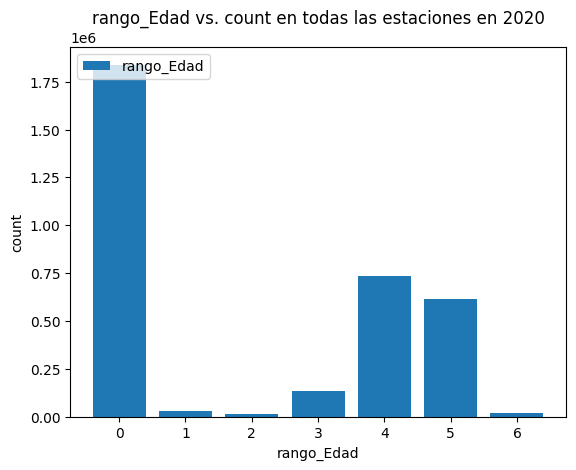

In [6]:
consulta.imprimeCantidad('Viajes por grupo de Edad', 'rango_Edad', y)

Predominan los usuarios cuya información de Edad no está disponible, sin embargo, de los que si que lo está, son bastante mayores los de los grupos de 27 a 40 años y de 40 a 66 años. Seguramente influido, entre otros factores, por el mucho mayor rango de edades contenido en estos grupos. 

Viajes por grupo de Edad, en todo 2020
+----------+-----+
|rango_Edad|count|
+----------+-----+
|1         |167  |
|6         |214  |
|3         |1606 |
|5         |7793 |
|4         |8136 |
|2         |72   |
|0         |22970|
+----------+-----+



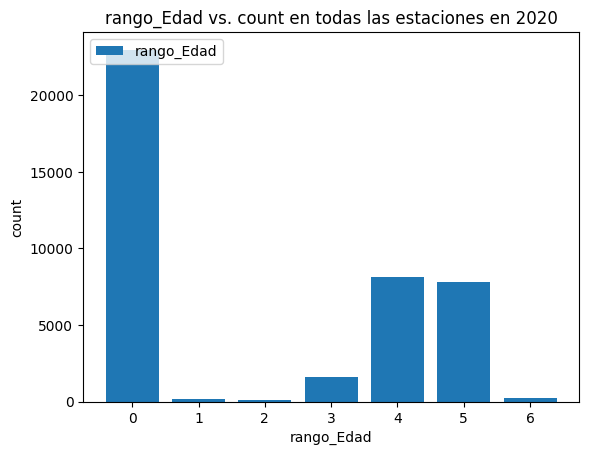

In [7]:
dCU.imprimeCantidad('Viajes por grupo de Edad', 'rango_Edad', y)

La forma que toma la distribución de las edades es muy similar en las estaciones de Sol a la del resto de estaciones.

Afluencia por hora, en todo 2020
+----+------+
|Hora|count |
+----+------+
|12  |144854|
|22  |138379|
|1   |55973 |
|13  |173804|
|6   |27566 |
|16  |189424|
|3   |19763 |
|20  |281800|
|5   |12262 |
|19  |269204|
+----+------+
only showing top 10 rows



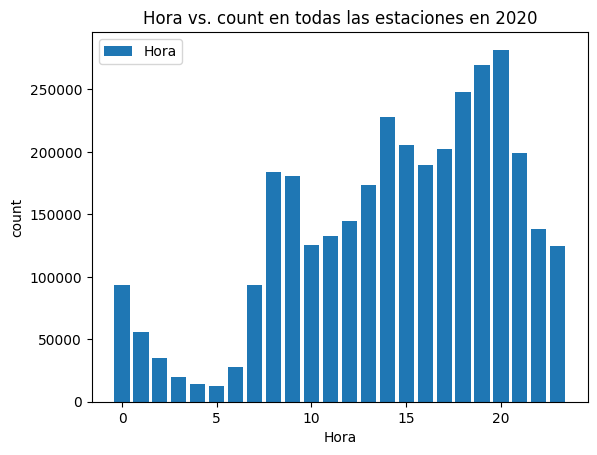

In [8]:
consulta.imprimeCantidad('Afluencia por hora', 'Hora', y)

Como cabría esperar, las horas más bajas son las de la noche. Destacan los picos a las 8-9, 14 y 19-20, que bien podrían asociarse con las horas de entrada y salida de trabajos y clases.

Afluencia por hora, en todo 2020
+----+-----+
|Hora|count|
+----+-----+
|12  |1851 |
|22  |1990 |
|1   |731  |
|13  |2323 |
|6   |308  |
|16  |2447 |
|3   |274  |
|20  |3342 |
|5   |265  |
|19  |3397 |
+----+-----+
only showing top 10 rows



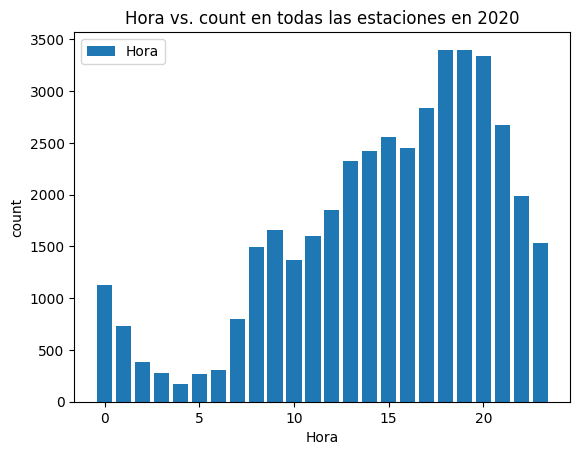

In [9]:
dCU.imprimeCantidad('Afluencia por hora', 'Hora', y)

Vuelven a tomar un aspecto similar a los datos de todas las estaciones. Teniendo un pico mucho menos pronunciado por la mañana. 

En conjunto, podemos decir que las estaciones de Sol son una muestra muy representativa del conjunto en todos los aspectos salvo en el tiempo medio de uso.

In [10]:
consulta.spark.stop()

Iniciamos las constantes de ruta para el año 2019 y la estación de Sol. Y hacemos la consulta.

In [11]:
y = 2019
nEst = 'Sol'
pathY = pathYear(y)
consulta = Consulta([f'{pathY}/{item}' for item in os.listdir(pathY) if item.endswith('.json')])

In [12]:
print(f'Viajes hechos en {y}')
consulta.describe()

Viajes hechos en 2019
+-------+-----------------+------------------+------------------+------------------+
|summary|         Duracion|      tipo_Usuario|        rango_Edad|              Hora|
+-------+-----------------+------------------+------------------+------------------+
|  count|          3787674|           3787674|           3787674|           1862905|
|   mean|19.16592180583657|1.1436963688004829| 2.358313043836402|13.769822401034943|
| stddev|  345.50319259057|0.5072168676705622|2.1825572016021417| 5.959838073973232|
|    min|             0.02|                 0|                 0|                 0|
|    max|        321214.82|                 3|                 6|                23|
+-------+-----------------+------------------+------------------+------------------+



El tiempo medio de los viajes fue menor que en 2020. Pero la cantidad total de viajes fue mucho mayor: 407912 viajes más que en 2020. No resulta sorprendente dadas las restricciones de movilidad presentes durante la mayor parte de 2020. El resto de datos son bastante similares, aunque con la media del rango de edad inclinándose a valores más altos.

In [13]:
dCU = consulta.formateaEstaciones().filtraEstaciones(nEst)

print(f'Viajes hechos desde o hasta las estaciones de {nEst} en {y}')
dCU.describe()

Viajes hechos desde o hasta las estaciones de Sol en 2019
+-------+-----------------+-------------------+------------------+------------------+
|summary|         Duracion|       tipo_Usuario|        rango_Edad|              Hora|
+-------+-----------------+-------------------+------------------+------------------+
|  count|            74192|              74192|             74192|             26817|
|   mean| 16.7137756092301| 1.1058739486737115| 2.225765581194738|13.752358578513629|
| stddev|50.32585905201387|0.42035395190365854|2.1920515330411554| 6.305080717919766|
|    min|             0.05|                  0|                 0|                 0|
|    max|          11051.1|                  3|                 6|                23|
+-------+-----------------+-------------------+------------------+------------------+



Las estaciones de sol siguen teniendo datos bastante parecidos a los globales, salvo en la duración. En este caso, la duración por estas estaciones fue menor.

Viajes por grupo de Edad, en todo 2019
+----------+-------+
|rango_Edad|count  |
+----------+-------+
|1         |35815  |
|6         |19627  |
|3         |199425 |
|5         |783469 |
|4         |1057236|
|2         |17190  |
|0         |1674912|
+----------+-------+



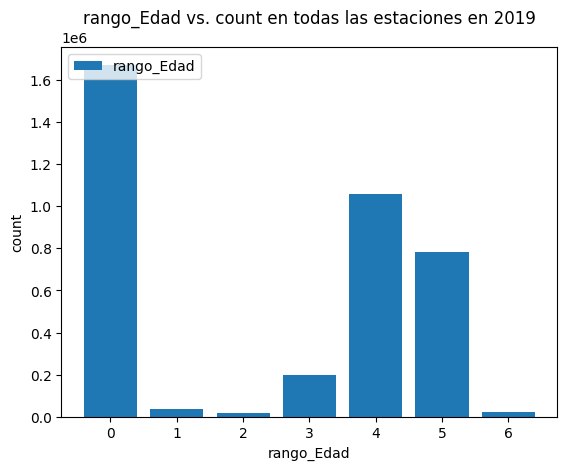

In [14]:
consulta.imprimeCantidad('Viajes por grupo de Edad', 'rango_Edad', y)

 Vuelven a predominar los grupos 4 y 5, pero en este caso la diferencia es mucho más acentuada y la cantidad sin identificar es menor, a pesar de la mayor cantidad de viajes este año. 

Viajes por grupo de Edad, en todo 2019
+----------+-----+
|rango_Edad|count|
+----------+-----+
|1         |396  |
|6         |474  |
|3         |3552 |
|5         |14100|
|4         |20080|
|2         |209  |
|0         |35381|
+----------+-----+



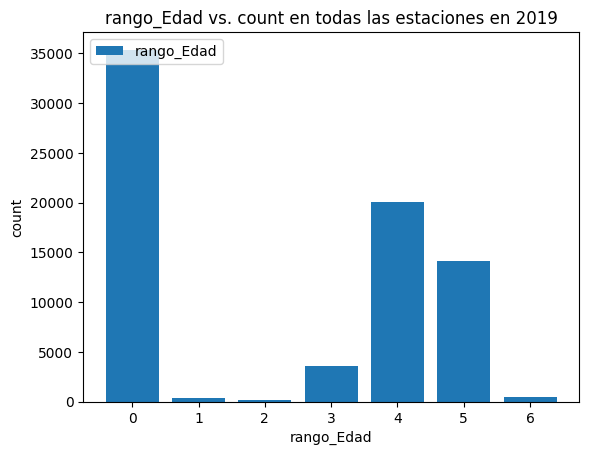

In [15]:
dCU.imprimeCantidad('Viajes por grupo de Edad', 'rango_Edad', y)

Igual que pasaba en 2020 se presentan unos datos muy similares a los globales, esta estación sigue siendo representativa de los datos globales de 2019. Aunque en Sol la cantidad de usuarios cuya edad está sin identificar es mayor.